<a href="https://colab.research.google.com/github/ishaan175pathak/Machine-Learning-from-Scratch/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import scipy
from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import pandas
from typing import List
import warnings

warnings.filterwarnings("ignore")

In [ ]:
data = fetch_california_housing()
X_main, y = data.data, data.target

In [ ]:
X = X_main[:, 0]

In [ ]:
split = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in split.split(X, y):
  X_train, y_train = X[train_index], y[train_index]
  X_test, y_test = X[test_index], y[test_index]

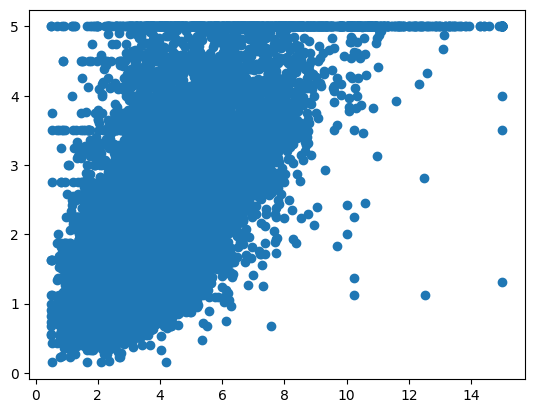

In [ ]:
plt.scatter(X, y)

In [ ]:
class SimpleLinearRegression:

  def costFunction(self):
    h_theta = numpy.dot(self.X, self.theta)

    J_theta = (numpy.sum(numpy.square(h_theta - self.y))) / (2*(len(self.X)))

    return J_theta

  def gradientDescent(self):
    self.cost_list = list()

    for iter in range(self.n_iter):
      print(f"{iter} running")
      for theta_index in range(len(self.theta)):
        cost = numpy.mean((numpy.dot(self.X, self.theta) - self.y) * self.X[:, theta_index])
        self.theta[theta_index] = self.theta[theta_index] - (self.alpha * cost)
        print(cost)
        print(self.theta)
        print("-"*30)
      if iter and not(iter % 10):
        self.cost_list.append(self.costFunction())



  def fit(self, X_train: List[int], y_train: List[int], n_iterations: int = 1500, alpha: int = 0.01):
    self.X = numpy.c_[numpy.ones(len(X_train)), X_train]
    self.y = y_train
    self.n_iter = n_iterations
    self.alpha = alpha
    self.theta = numpy.zeros(2)
    print(self.theta)
    self.gradientDescent()
    print(self.theta)

  def plotData(self):
    plt.figure(figsize=(25, 6))
    plt.plot(self.X[:, 1],numpy.dot(self.X, self.theta), "r-", marker = "s")
    plt.scatter(self.X[:, 1], self.y)
    plt.axis([0, numpy.max(self.X[:, 1])+1, 0, numpy.max(self.y)+0.5])
    plt.xlabel("$X_1$")
    plt.ylabel("Price")

Streaming output truncated to the last 5000 lines.
------------------------------
786 running
-0.014876116762393412
[0.37164387 0.43459827]
------------------------------
0.0031228683061405318
[0.37164387 0.43456705]
------------------------------
787 running
-0.014848231552754174
[0.37179236 0.43456705]
------------------------------
0.003117014504454317
[0.37179236 0.43453588]
------------------------------
788 running
-0.014820398613807007
[0.37194056 0.43453588]
------------------------------
0.0031111716756905207
[0.37194056 0.43450476]
------------------------------
789 running
-0.014792617847570534
[0.37208849 0.43450476]
------------------------------
0.0031053397992818056
[0.37208849 0.43447371]
------------------------------
790 running
-0.01476488915624731
[0.37223613 0.43447371]
------------------------------
0.0030995188546975297
[0.37223613 0.43444272]
------------------------------
791 running
-0.014737212442223318
[0.37238351 0.43444272]
------------------------------
0

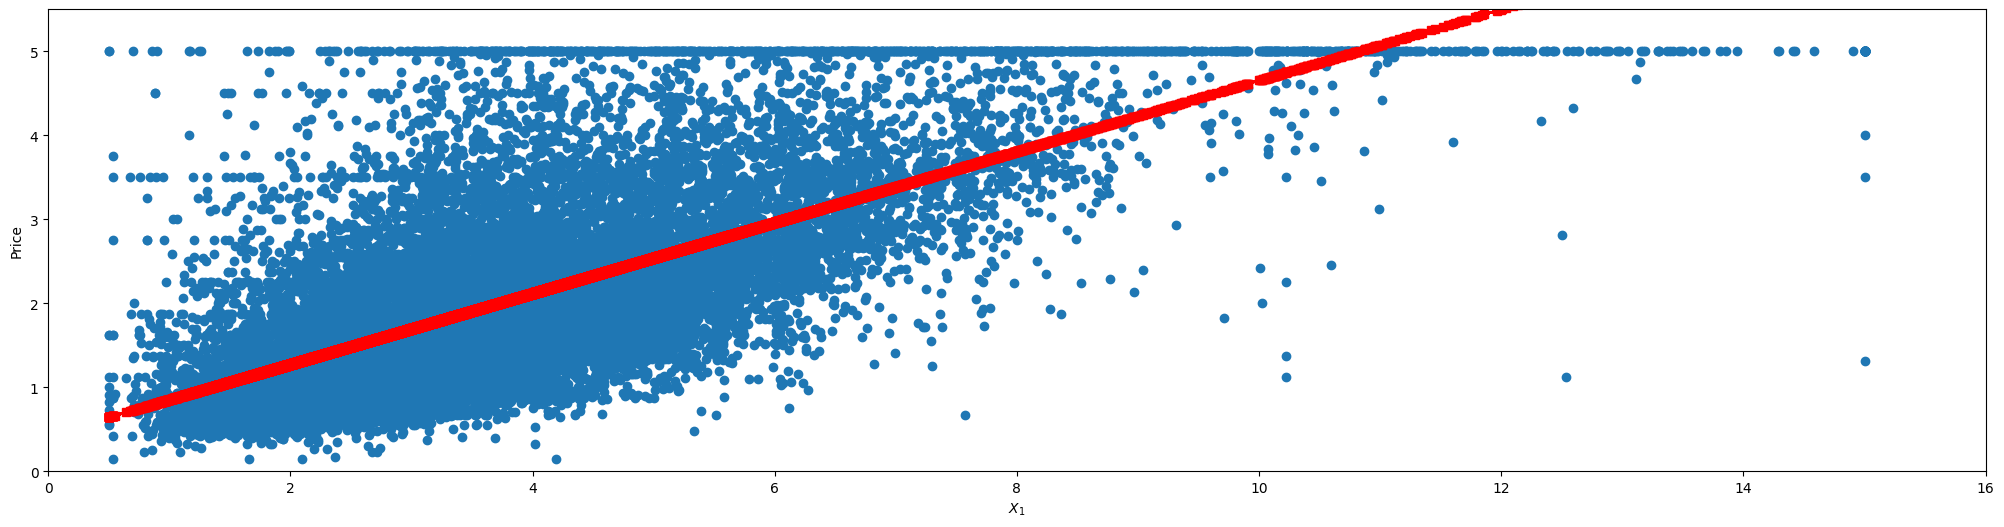

In [ ]:
lr = SimpleLinearRegression()
lr.fit(X, y)
lr.plotData()

### <center>  </center>

## <center> **Multiple Linear Regression** </center>

In [ ]:
class MultipleLinearRegression:
  def costFunction(self):
    J_theta = numpy.dot(self.X, self.theta)

    return (numpy.sum(numpy.square(numpy.dot(self.X, self.theta) - self.y))) / (2 * self.X.__len__())

  def meanNormalization(self, X: List[int]):
    return (X - self.mean) / self.std

  def gradientDescent(self):
    self.cost_history = list()
    curr_error = float("inf")
    counter = 0
    for iter in range(self.n_iter):
      self.cost_history.append(self.costFunction())
      error = numpy.dot(self.X, self.theta) - self.y # X is [m, n+1] & theta is [n+1,] resultant is [m,] also y is [m,]
      cost = numpy.dot(self.X.T, error)# X is [m, n+1] & error is [m,] resultant is [n+1,] which is of shape same as theta
      error = self.costFunction()
      if error <= curr_error:
        curr_error = error
        self.theta = self.theta - ((self.alpha) * cost)
        counter = 0
      elif counter == 10:
        break
      else:
        counter += 1
  def fit(self, X_train: List[int], y_train: List[int], n_iterations: int = 1500, alpha: int = 0.001):
    self.mean = numpy.mean(X_train, axis = 0)
    self.std = numpy.std(X_train, axis = 0)
    X_train = self.meanNormalization(X_train)
    self.X = numpy.c_[numpy.ones(len(X_train)), X_train]
    self.y = y_train
    self.n_iter = n_iterations
    self.alpha = alpha
    self.theta = numpy.zeros(self.X.shape[1])
    self.gradientDescent()

  def predict(self, X_test: List[int], y_test: List[int]):
    X_test = self.meanNormalization(X_test)
    X_test = numpy.c_[numpy.ones(len(X_test)), X_test]
    print(self.theta)
    predict_value = numpy.round(numpy.dot(X_test, self.theta), 2)
    y_test = numpy.round(y_test, 2)

    return numpy.mean(predict_value == y_test)

  def plotData(self):
    """
        We will consider a 2 dimension dataset only, for visualization purpose
    """
    plt.figure(figsize=(20, 8))
    ax = plt.axes(projection="3d")
    ax.scatter3D(self.X[:, 1], self.X[:, 2], self.y, alpha = 0.8)
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    ax.set_zlabel('Z')
    ax.zaxis.labelpad= -2
    ax.set_title("Plotting first 2 features with respect to target feature", fontsize = 15)

  def plotGradientDescent(self):

    fig = plt.figure(figsize = (15,5))
    plt.plot(numpy.arange(self.cost_history.__len__()), self.cost_history, "r-o")
    plt.title("Plotting Gradient Descent", fontsize=18)
    plt.xlabel("number of iterations")
    plt.ylabel("Error")

In [ ]:
mlr = MultipleLinearRegression()
X_temp, y_temp = make_regression(n_samples= 1000, n_features = 5)

mlr.fit(X_temp, y_temp)

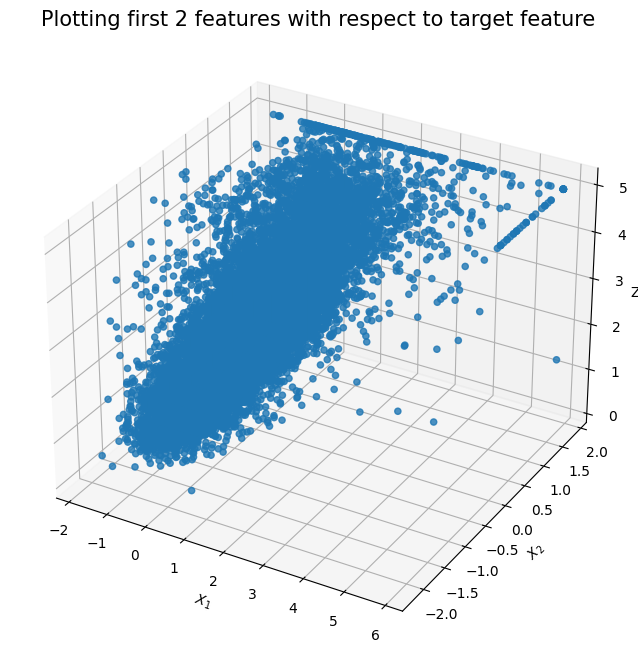

In [ ]:
mlr.plotData()

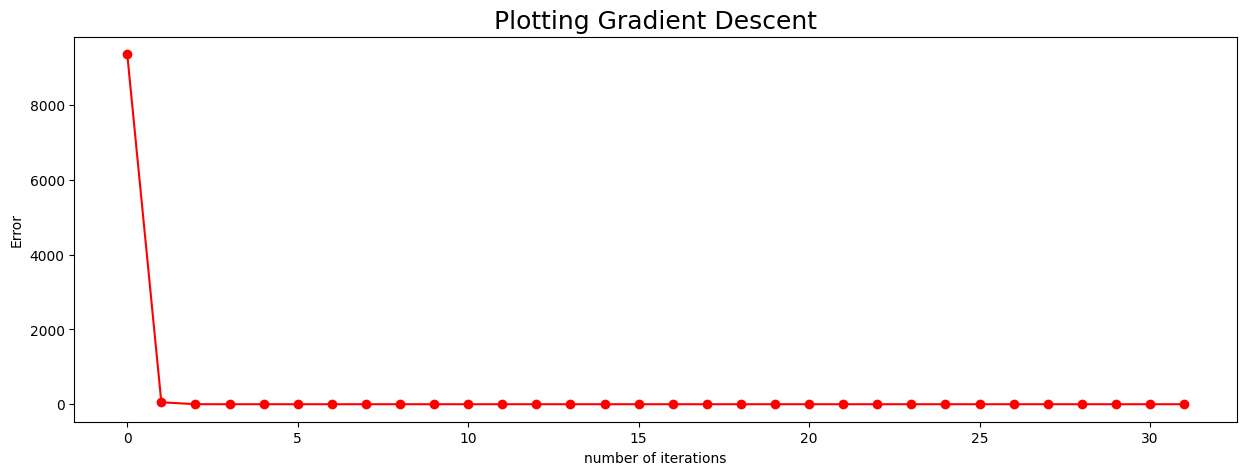

In [ ]:
mlr.plotGradientDescent()

In [ ]:
mlr.predict(X_temp, y_temp)

[-2.9083954  88.72201501  5.32199227 60.15867669 13.26148278 81.68613526]


1.0

## Normal Equation